In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

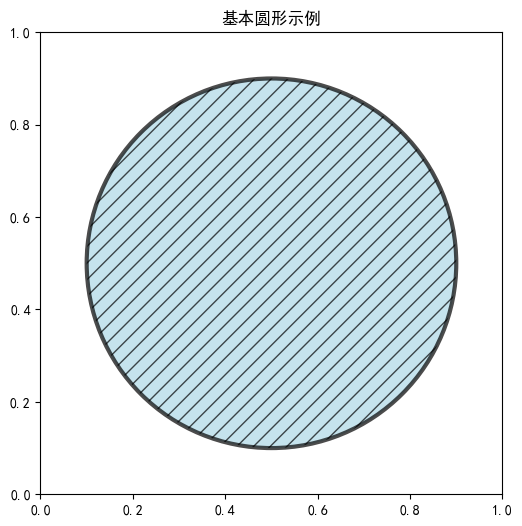

In [3]:
from matplotlib.patches import Circle

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(6, 6))

# 创建一个圆形
circle = Circle(xy=(0.5, 0.5),      # 圆心
                radius=0.4,         # 半径
                facecolor='lightblue',    # 填充颜色
                edgecolor='black',  # 边框颜色
                linewidth=3,        # 边框宽度
                alpha=0.7,          # 透明度
                hatch='//')         # 填充图案

# 将圆形添加到坐标轴
ax.add_patch(circle)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')  # 保证x/y轴比例一致，圆形不变形

plt.title('基本圆形示例')
plt.show()

# 2、使用示例：

### 示例 1：创建靶心图

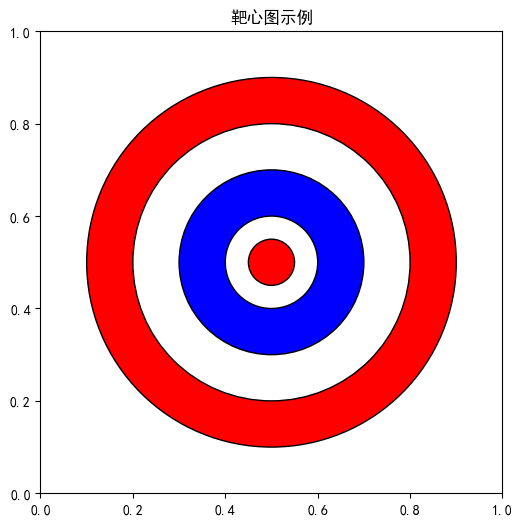

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))

# 定义同心圆的颜色列表
colors = ['red', 'white', 'blue', 'white', 'red']
# 定义同心圆的半径列表，从外到内半径逐渐减小
radius = [0.4, 0.3, 0.2, 0.1, 0.05]

# 循环创建圆形对象
for i, (color, radius) in enumerate(zip(colors, radius)):
    circle = Circle((0.5, 0.5), radius, facecolor=color, edgecolor='black')
    ax.add_patch(circle)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title('靶心图示例')
plt.show()

### 示例 2：圆形与数据标签结合（标注特定点）

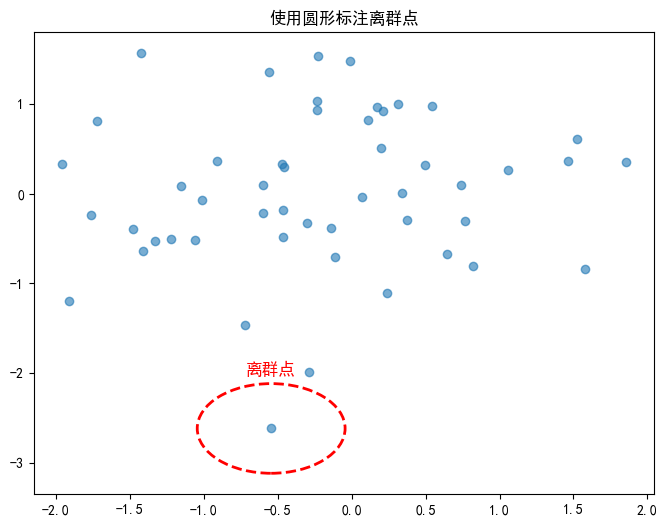

In [5]:
# 生成随机数
np.random.seed(42)
x = np.random.randn(50)
y = np.random.randn(50)

fig, ax = plt.subplots(figsize=(8, 6))

# 绘制散点图
ax.scatter(x, y, alpha=0.6)

# 寻找离群点
outlier_index = np.argmax(x**2 + y**2)
# 创建圆形对象用于高亮离群点
highlight = Circle((x[outlier_index], y[outlier_index]), 0.5,
                   fill=False, edgecolor='red', linewidth=2, linestyle='--')
ax.add_patch(highlight)

# 在离群点上方添加文字标注
ax.text(x[outlier_index], y[outlier_index]+0.6, '离群点', 
        ha='center', fontsize=12,color='red')

plt.title('使用圆形标注离群点')
plt.show()

### 示例 3：绘制多圆形组合（模拟散点图）

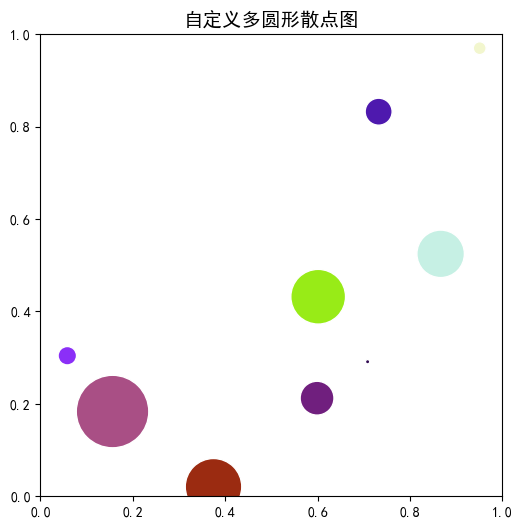

In [6]:
from matplotlib.patches import Circle

# 生成随机数据
np.random.seed(42)
x = np.random.rand(10)  
y = np.random.rand(10)
radii = np.random.rand(10) * 0.1
colors = np.random.rand(10, 3)  # 随机RGB颜色（10个点，每个点3个通道）

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('自定义多圆形散点图', fontsize=14)

# 循环添加每个圆形
for xi, yi, ri, ci in zip(x, y, radii, colors):
    circle = Circle(xy=(xi, yi), radius=ri, fc=ci, ec='white', lw=1)
    ax.add_patch(circle)

plt.show()

### 示例 4：裁剪图像

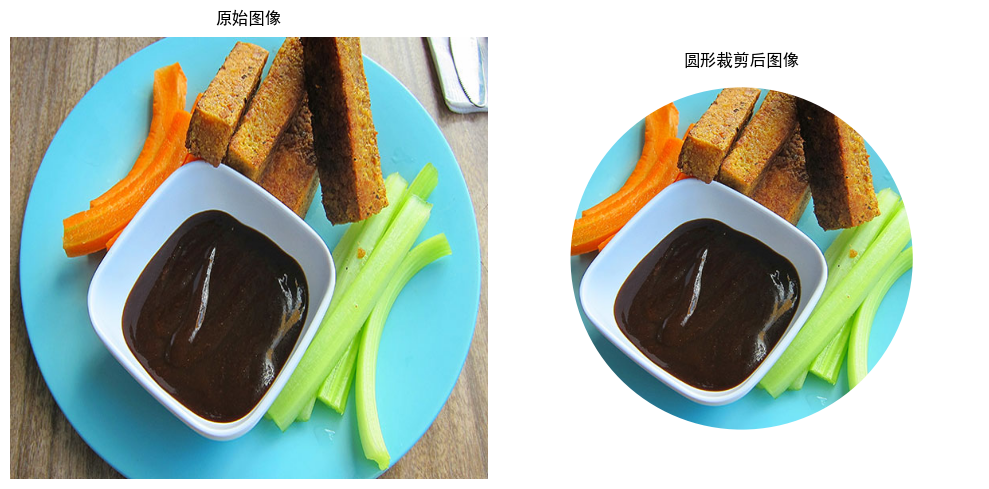

In [7]:
from matplotlib.patches import Circle

# 读取图像
img_path = "example.jpg"
image = plt.imread(img_path)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 绘制原始图像，imshow()的参数aspect='auto'确保图像不被拉伸
ax1.imshow(image, aspect='auto')
ax1.set_title('原始图像', fontsize=12, pad=10)
ax1.axis('off')

# 圆形裁剪
img = ax2.imshow(image, aspect='auto')
ax2.set_title('圆形裁剪后图像', fontsize=12, pad=10)
ax2.axis('off')
ax2.set_aspect('equal')

# 计算图像中心与圆形半径
img_height, img_width = image.shape[0], image.shape[1]
center_x, center_y = img_width // 2, img_height // 2
radius = min(img_width, img_height) // 2 - 10

# 创建圆形裁剪路径
# transform=ax2.transData：确保圆形使用图像的“数据坐标系”（与图像像素对齐）
circle_clip = Circle(
    xy=(center_x, center_y),  # 圆心（图像中心）
    radius=radius,            # 半径（适配图像大小）
    transform=ax2.transData   # 绑定右侧子图的坐标系，否则圆形可能偏离图像
)

# 应用裁剪路径
img.set_clip_path(circle_clip)

plt.tight_layout()
plt.show()